### Mammographic Mass Classification
**Done by**:

Tahani FENNIR

**Subject**:

Machine Learning Project

### Dataset:

I choosed the dataset [Mammographic masses] which is a public dataset from UCI repository (https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass),  to build a classification model that Predicting whether a tumour is benign or malignant from BI-RADS attributes and the patient’s age( binary classification problem).

**Attribute Information**:

- BI-RADS assessment: ordinal 1 to 5.

- patient’s age in years.

- item Shape (mass shape): round=1, oval=2, lobular=3, irregular=4 (nominal).

- Mass margin: circumscribed=1, microlobulated=2, obscured=3, ill- defined=4, spiculated=5 (nominal)

- Mass density: high=1, iso=2, low=3, fat-containing=4 (ordinal)

- Severity: benign=0 or malignant=1 (binomial)

**Classification Algorithms**:
- Decision Tree Classifier
- Random Forest Classifier
- SVM
- Naive Bayes
- Logistic Regression
- Artificial Neural Network



In [39]:
import numpy as np
import pandas as pd
from sklearn import model_selection

In [40]:
data_file = 'mammographic_masses.data.txt';
masses_data = pd.read_csv(data_file,names =['BI-RADS','Age','Shape','Margin','Density','Severity'],usecols = ['Age','Shape','Margin','Density','Severity'],na_values='?')
masses_data.head()

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1


In [41]:
describ = masses_data.describe()
describ

,Age,Shape,Margin,Density,Severity
count,956.000000,930.000000,913.000000,885.000000,961.000000
mean,55.487448,2.721505,2.796276,2.910734,0.463059
std,14.480131,1.242792,1.566546,0.380444,0.498893
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [42]:
masses_data = masses_data.dropna()

In [43]:
miss = masses_data.describe()
miss

,Age,Shape,Margin,Density,Severity
count,831.000000,831.000000,831.000000,831.000000,831.000000
mean,55.777377,2.783394,2.814681,2.915764,0.484958
std,14.663528,1.242331,1.566771,0.350737,0.500075
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,46.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [44]:
features = list(masses_data.columns[:4])
print(features)
labels = list(masses_data.columns[4:])
print(labels)

['Age', 'Shape', 'Margin', 'Density']
['Severity']


In [45]:
X = masses_data[features].values
y = masses_data[labels].values
y = y.ravel()

In [46]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.76580356,  0.17445989,  1.39563127,  0.24031298],
       [ 0.15166622,  0.97988304,  1.39563127,  0.24031298],
       [-1.89545824, -1.43638642, -1.15892729,  0.24031298],
       ...,
       [ 0.56109111,  0.97988304,  1.39563127,  0.24031298],
       [ 0.69756608,  0.97988304,  1.39563127,  0.24031298],
       [ 0.42461615,  0.17445989,  0.11835199,  0.24031298]])

### DECISION TREE CLASSIFIER


In [48]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

In [49]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.7740384615384616

In [50]:
#ROC Curve
import matplotlib.pyplot as plt
from sklearn import metrics
def createROC(y_test, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr,tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

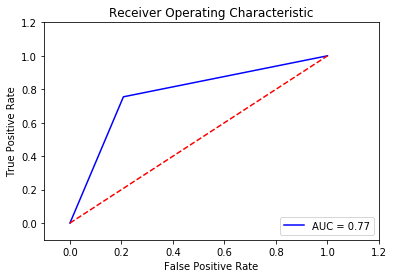

In [51]:
createROC(y_test, y_pred)

In [52]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus


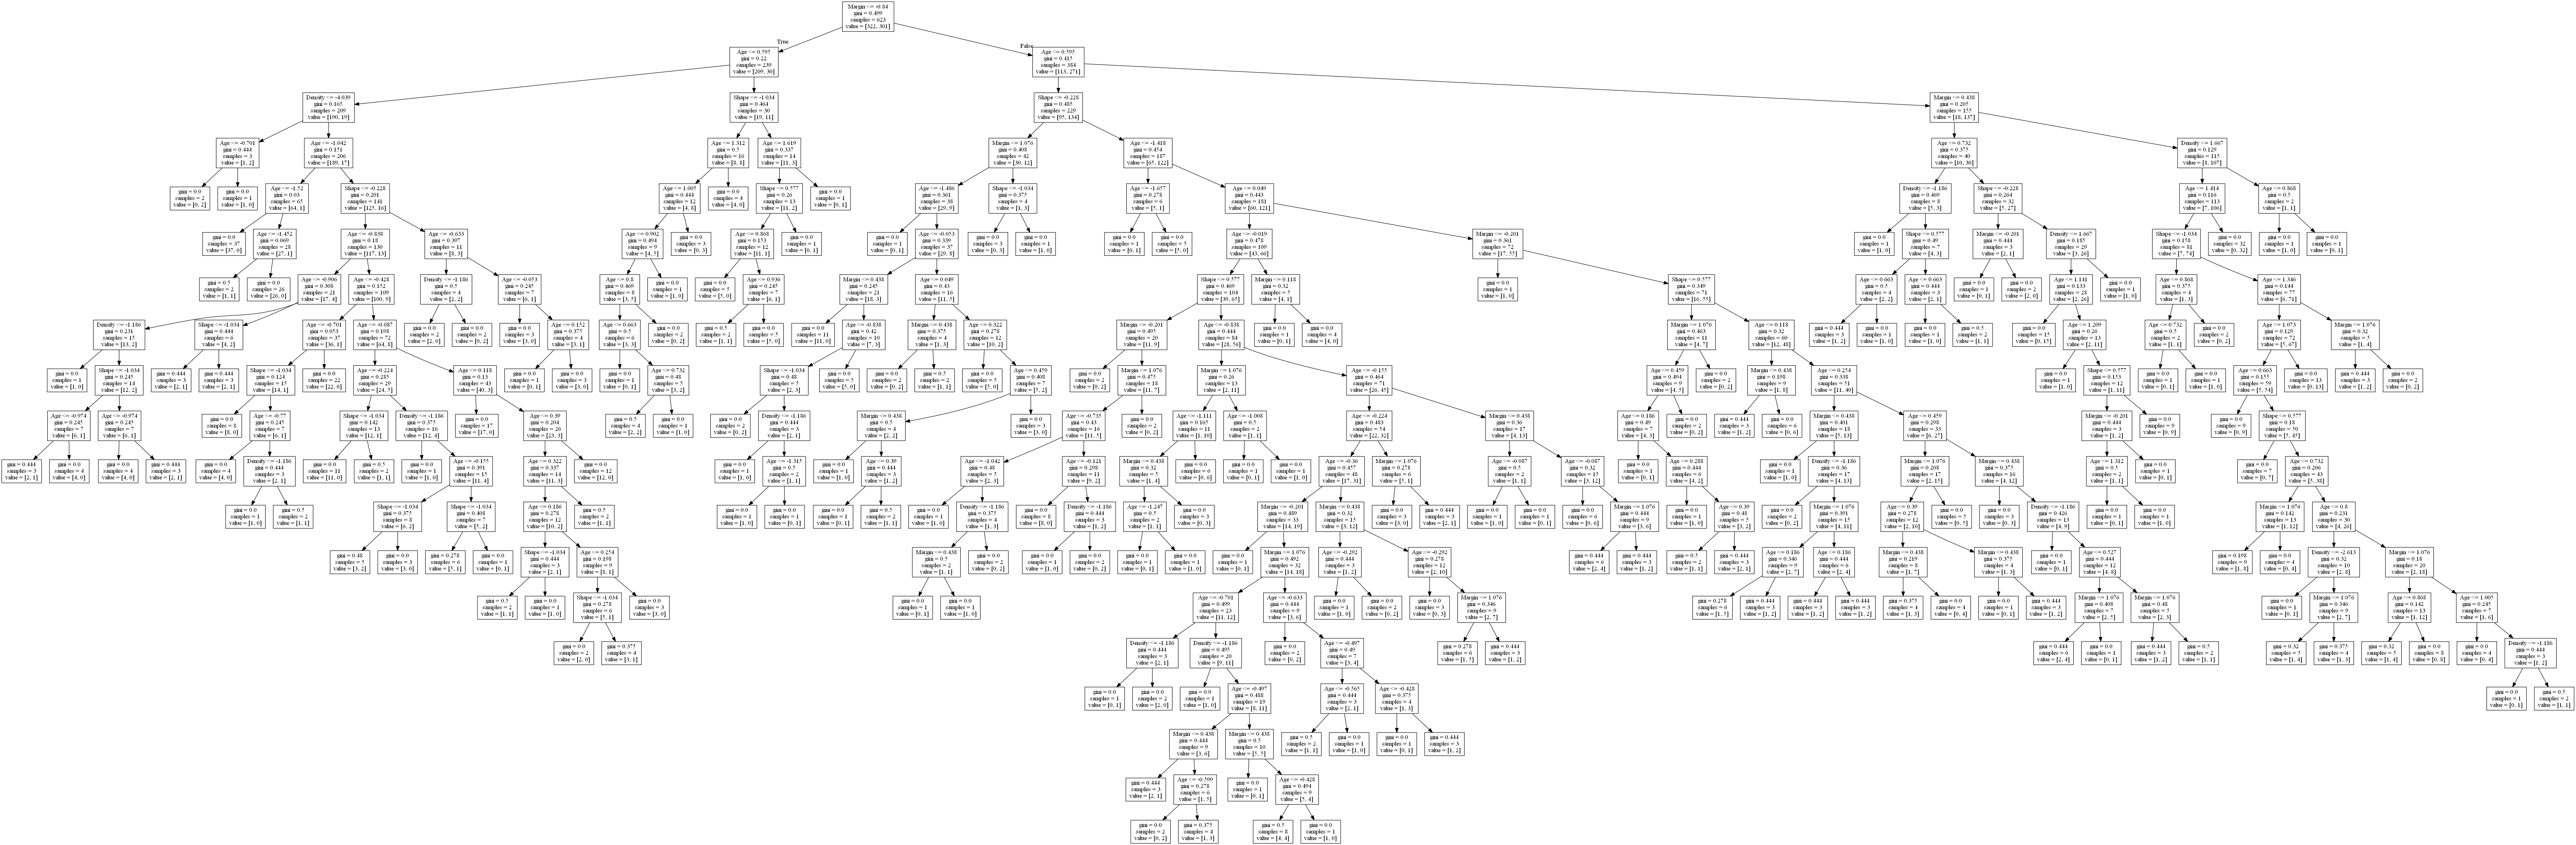

In [32]:
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [53]:
# Using K-Fold Cross Validation
clf = tree.DecisionTreeClassifier(random_state=0)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[0.71428571 0.74698795 0.71084337 0.75903614 0.77108434 0.69879518
 0.73493976 0.74698795 0.75903614 0.6746988 ]
0.731669535283993


### RANDOM FOREST CLASSIFIER

In [54]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[0.75       0.77108434 0.74698795 0.81927711 0.80722892 0.71084337
 0.75903614 0.77108434 0.74698795 0.62650602]
0.7509036144578313


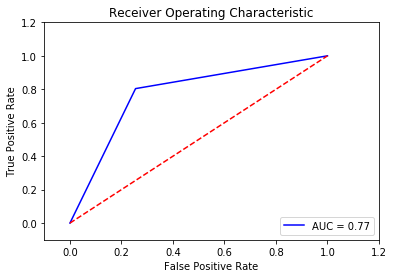

In [55]:
createROC(y_test, y_pred)

### SVM

In [57]:
#1. LINEAR KERNEL
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1)
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[0.71428571 0.78313253 0.79518072 0.73493976 0.8313253  0.71084337
 0.77108434 0.78313253 0.80722892 0.68674699]
0.761790017211704


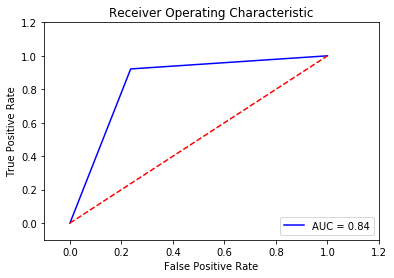

In [58]:
createROC(y_test, y_pred)

In [59]:
#2. POLY KERNEL
# Polynomial kernel represents the similarity of training samples in a feature space over polynomials of the original variables.
from sklearn import svm
svc = svm.SVC(kernel='poly', C=1)
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[0.71428571 0.77108434 0.77108434 0.74698795 0.80722892 0.72289157
 0.77108434 0.75903614 0.77108434 0.73493976]
0.7569707401032703


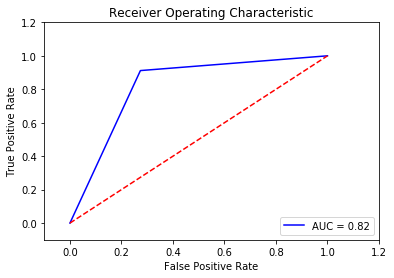

In [60]:
createROC(y_test, y_pred)

In [61]:
#3. RBF KERNEL
from sklearn import svm
svc = svm.SVC(kernel='rbf', C=1)
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[0.73809524 0.77108434 0.77108434 0.74698795 0.81927711 0.73493976
 0.80722892 0.79518072 0.74698795 0.6746988 ]
0.760556511761331


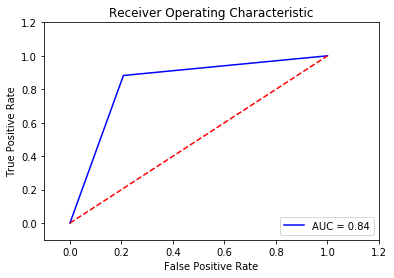

In [62]:
createROC(y_test, y_pred)

In [63]:
#4. SIGMOID KERNEL
from sklearn import svm
svc = svm.SVC(kernel='sigmoid', C=1)
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[0.71428571 0.71084337 0.73493976 0.74698795 0.80722892 0.69879518
 0.74698795 0.74698795 0.73493976 0.65060241]
0.7292598967297763


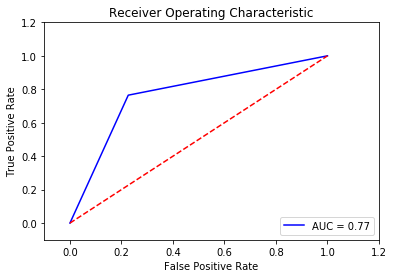

In [64]:
createROC(y_test, y_pred)

### NAIVE BAYES

In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
clf = MultinomialNB()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# clf.score(X_test,y_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[0.73809524 0.77108434 0.79518072 0.8313253  0.8313253  0.77108434
 0.71084337 0.75903614 0.89156627 0.71084337]
0.7810384394721744


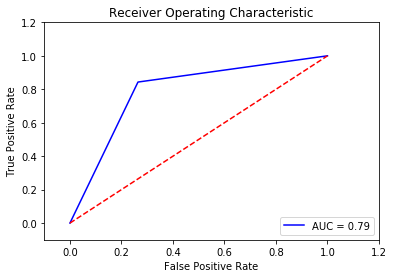

In [67]:
createROC(y_test, y_pred)

### LOGISTIC REGRESSION

In [69]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1e5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[0.75       0.77108434 0.85542169 0.81927711 0.81927711 0.73493976
 0.79518072 0.81927711 0.87951807 0.79518072]
0.8039156626506024


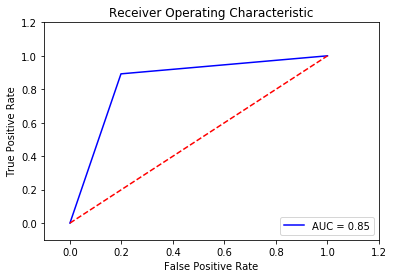

In [70]:
createROC(y_test, y_pred)

### ARTIFICIAL NEURAL NETWORK

In [72]:
# Load the libraries.
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [105]:
# Sequential provides training and inference features on this model.
# create a Sequential model and add layers one at a time until we are happy with our network architecture.
model = Sequential()
# Ensure the input layer has the right number of input features by creating the first layer with the input_dim argument and setting it to 4.
# Use a fully-connected network structure with four layers using Dense class.
# Specify the number of neurons or nodes in the layer as the first argument.
# Specify the activation function using the activation argumen
# ReLU is stand for rectified linear unit activation function.
# The shape of the input to the model is defined as an argument on the first hidden layer.
model.add(Dense(64,input_dim=4,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,kernel_initializer='normal',activation='relu'))
# Use a sigmoid on the output layer to ensure our network output is between 0 and 1.
model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
# Specify the loss function to use to evaluate a set of weights.
# Optimizer is used to search through different weights for the network and any optional metrics.
# Use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Training occurs over epochs and each epoch is split into batches.
model.fit(X_train,y_train,batch_size=10,epochs=150, verbose=2)

Epoch 1/150
 - 0s - loss: 0.6906 - accuracy: 0.6469
Epoch 2/150
 - 0s - loss: 0.6355 - accuracy: 0.7849
Epoch 3/150
 - 0s - loss: 0.5259 - accuracy: 0.7769
Epoch 4/150
 - 0s - loss: 0.5012 - accuracy: 0.7801
Epoch 5/150
 - 0s - loss: 0.4916 - accuracy: 0.7849
Epoch 6/150
 - 0s - loss: 0.4979 - accuracy: 0.7737
Epoch 7/150
 - 0s - loss: 0.4895 - accuracy: 0.7833
Epoch 8/150
 - 0s - loss: 0.4816 - accuracy: 0.7849
Epoch 9/150
 - 0s - loss: 0.4813 - accuracy: 0.7785
Epoch 10/150
 - 0s - loss: 0.4960 - accuracy: 0.7817
Epoch 11/150
 - 0s - loss: 0.4826 - accuracy: 0.7705
Epoch 12/150
 - 0s - loss: 0.4801 - accuracy: 0.7897
Epoch 13/150
 - 0s - loss: 0.4853 - accuracy: 0.7865
Epoch 14/150
 - 0s - loss: 0.4851 - accuracy: 0.7801
Epoch 15/150
 - 0s - loss: 0.4771 - accuracy: 0.7849
Epoch 16/150
 - 0s - loss: 0.4840 - accuracy: 0.7817
Epoch 17/150
 - 0s - loss: 0.4752 - accuracy: 0.7833
Epoch 18/150
 - 0s - loss: 0.4772 - accuracy: 0.7833
Epoch 19/150
 - 0s - loss: 0.4739 - accuracy: 0.7817
Ep

In [106]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.49093826229755694
Test accuracy: 0.8509615659713745


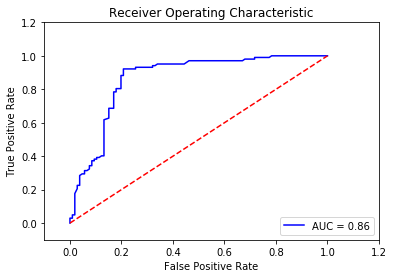

In [108]:
y_pred = model.predict(X_test)
createROC(y_test, y_pred)